## Considerando o conjunto de dados hospital apresentado na primeira aula (ver arquivo em anexo):

1:Calcular, para cada coluna desse conjunto de dados, as estatísticas univariadas pertinentes dentre frequências, moda, média, mediana, desvio-padrão, Q1, Q3, obliquidade e curtose.

2:Calcular estatísticas multivariadas de covariância e correção para os atributos quantitativos presentes.


3:Plotar boxplots dos atributos pertinentes e identificar a presença ou não de outliers.


4:Plotar histogramas dos atributos e interpretar sua distribuição, considerando as classes.

*Recomenda-se o uso da linguagem Python e das biblioteca pandas, numpy e matplotlib para realização dos exercícios, mas não é obrigatório.*

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import skew,kurtosis, mode
import matplotlib.pyplot as plt


### Estatística univariada significa analisar uma variável por vez. Exemplo: "Qual a média da idade?", "Qual a obliquidade da temperatura?".

Média: valor médio de cada atributo.

Mediana: valor central (50% dos dados estão abaixo e 50% acima).

Moda: valor mais frequente na amostra.

Desvio-Padrão: medida de dispersão dos dados.

Q1 e Q3: primeiro e terceiro quartis (25% e 75% dos dados, respectivamente).

Obliquidade (Skewness): indica assimetria da distribuição.

Curtose (Kurtosis): indica o grau de "achatamento" da curva em relação à normal.

In [ ]:
df = pd.read_excel('hospital.xlsx')

# Escolher uma coluna numérica
coluna = df['IDADE'].dropna() ## DROP NaN

# Média
media = np.mean(coluna)

#Mediana
mediana = np.median(coluna)

#Moda
moda = coluna.mode().values[0]

#Desvio padrão
dp = np.std(coluna,ddof=1) ## ddof = 1 -> Calculo amostral

# Quartis
q1 = np.percentile(coluna,25)
q3 = np.percentile(coluna,75)

# Obliquidade
obliquidade = skew(coluna)

# Curtose
curtose = kurtosis(coluna)

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Desvio Padrão: {dp}")
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"Obliquidade: {obliquidade}")
print(f"Curtose: {curtose}")


### 2:Calcular estatísticas multivariadas de covariância e correção para os atributos quantitativos presentes.
Agora vamos olhar a relação entre duas variáveis numéricas.

*Exemplo: Existe relação entre a idade e o número de internações?*

In [ ]:
# Selecionar todas as colunas numéricas
df_num = df[['IDADE','PESO','TEMP.','#INT.']]

# Covariância
cov_matrix = df_num.cov()
print("Covariância:")
print(cov_matrix)

# Correlação de Pearson
corr_matrix = df_num.corr()
print("\nCorrelação")
print(corr_matrix)

### 3:Plotar boxplots dos atributos pertinentes e identificar a presença ou não de outliers.

Boxplot mostra a distribuição dos dados, o intervalo interquartil (Q1 a Q3) e os outliers (valores muito fora do padrão).

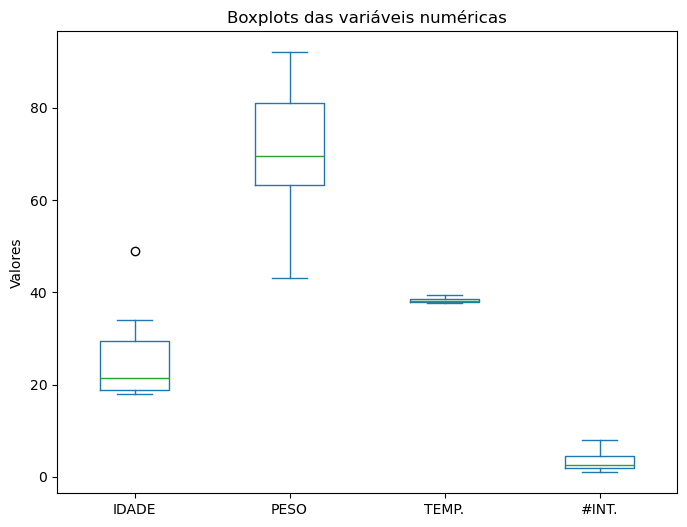

In [11]:
# Blotpot de todas as variáveis numéricas

df_num.plot(kind='box',figsize=(8,6))
plt.title('Boxplots das variáveis numéricas')
plt.ylabel('Valores')
plt.show()

Temos outliers na categoria IDADE

### 4:Plotar histogramas dos atributos e interpretar sua distribuição, considerando as classes.

O histograma mostra a frequência de ocorrência dos valores em diferentes intervalos.

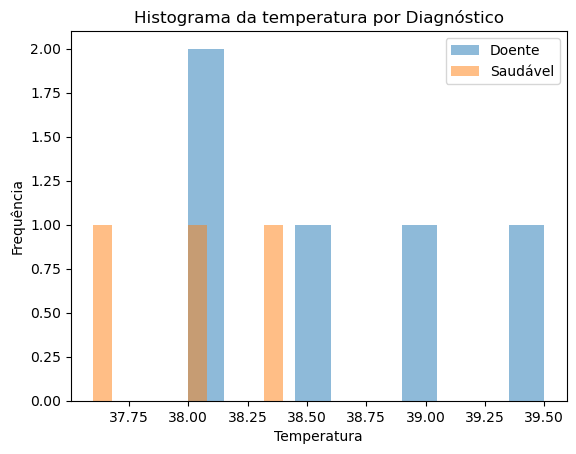

In [10]:

# Criar histograma para cada classe de diagnostico

for diagnostico in df['DIAGNÓSTICO'].unique():
    subset = df[df['DIAGNÓSTICO'] == diagnostico]
    plt.hist(subset['TEMP.'],bins=10, alpha=0.5,label=diagnostico)

plt.title('Histograma da temperatura por Diagnóstico')
plt.xlabel('Temperatura')
plt.ylabel('Frequência')
plt.legend()
plt.show()

Pela distribuição do histograma relacionando a temperatura com o diagnóstico, observamos que quanto maior a temperatura, maior a probabilidade desse paciente estar doente
